<a href="https://colab.research.google.com/github/weeg16/STINTSY/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **STINTSY Machine Project**

<font face="Comic Sans MS" size=7 color='#d39aed'>??????????????????<font>

## *Group # - S16*
- **Ang, Danielle Faith**
- **De Los Santos, Hanna Angela**
- **Robles, Luis Miguel**
- **Sarreal, Sophia Althea**

# **Section 1. Introduction to the problem / task and dataset**

[ explanation here ]

# **Section 2. Description of the dataset**

### 📌 Dataset Overview

This project uses the **Family Income and Expenditure Survey (FIES) 2012, Volume 1**, a public-use dataset published by the **Philippine Statistics Authority (PSA)**. It contains household-level socioeconomic data, including income from various sources, expenditures across categories, and demographic information.

The dataset supports research on living conditions, income inequality, and poverty assessment in the Philippines.

---

### 🧾 Data Collection Process

The FIES was conducted by the PSA using a **two-stage stratified sampling design**, covering both urban and rural households across the country. Respondents were interviewed using standardized questionnaires.

While the survey aims for national and regional representation, insights drawn from the data may be limited by **self-reporting biases**, **recall errors**, or **non-response from certain demographic groups**. These limitations should be considered when interpreting results.

---

### 📊 Dataset Structure

- **Filename:** `FIES PUF 2012 Vol.1.CSV`
- **Number of rows (instances):** 40,171
- **Number of columns (features):** 119
- Each **row** represents one household.
- Each **column** represents a household-level attribute, such as income, expenditure, or demographic information.

---

### 📋 Feature Descriptions (Selected)

Below is a description of selected features used in our analysis:

| Feature Name     | Description |
|------------------|-------------|
| `TOINC`          | Total household income from all sources |
| `WAGES`          | Total wages and salaries from employment (agri and non-agri) |
| `EAINC`          | Income from entrepreneurial activities |
| `T_FOOD`         | Total food-related expenditures |
| `T_TRANSPORT`    | Total transportation expenses |
| `HGC`            | Highest grade completed by head of household |
| `AGE`            | Age of the household head |
| `URB`            | Urban or rural classification (0 = Rural, 1 = Urban) |
| `PCINC`          | Per capita income of the household |
| `FSIZE`          | Number of household members |

We focus only on features relevant to our predictive task, but all features were reviewed and interpreted using the official FIES 2012 data dictionary.



# **Section 3. List of requirements**

## **Import Libraries**

In [2012]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split, learning_curve, KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import skew
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression # may remove
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE # may use insead of selectKbest
from sklearn.decomposition import PCA

# for neural networks

import tensorflow as tf
from tensorflow import keras
from keras.losses import Huber
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

### Below is the list of Python libraries and modules used in this project:

#### 📦 Data Manipulation
- `pandas` – for loading, cleaning, and manipulating data
- `numpy` – for numerical operations and array handling

#### 📊 Data Visualization
- `matplotlib.pyplot` – for creating static visualizations
- `seaborn` – for statistical visualizations and enhanced plots

#### ⚙️ Data Preprocessing and Feature Engineering
- `sklearn.preprocessing.StandardScaler` – for standardizing feature values
- `sklearn.preprocessing.PowerTransformer` – for normalizing skewed distributions
- `sklearn.impute.SimpleImputer` – for handling missing data
- `scipy.stats.skew` – for computing skewness
- `scipy.stats.mstats.winsorize` – for limiting extreme values (winsorization)

#### 🔍 Feature Selection and Dimensionality Reduction
- `sklearn.feature_selection.SelectKBest` – for selecting top features (based on statistical scores)
- `sklearn.feature_selection.f_regression`, `mutual_info_regression` – scoring functions for `SelectKBest`
- `sklearn.feature_selection.RFE` – Recursive Feature Elimination for feature ranking
- `sklearn.decomposition.PCA` – Principal Component Analysis for dimensionality reduction

#### 🧠 Model Training and Evaluation
- `sklearn.model_selection.train_test_split` – for splitting data into training and test sets
- `sklearn.model_selection.learning_curve` – for generating learning curves
- `sklearn.model_selection.KFold` – for k-fold cross-validation
- `sklearn.neighbors.KNeighborsRegressor` – KNN model for regression tasks
- `sklearn.linear_model.LinearRegression`, `Lasso`, `LassoCV`, `Ridge` – linear models with and without regularization
- `sklearn.metrics.mean_squared_error`, `mean_absolute_error` – for evaluating model performance
- `statsmodels.stats.outliers_influence.variance_inflation_factor` – for detecting multicollinearity

#### 🤖 Neural Network Models (TensorFlow & Keras)
- `tensorflow` – for building and training neural networks
- `tensorflow.keras.models.Sequential` – for creating a sequential neural network model
- `tensorflow.keras.layers.Dense`, `Dropout`, `BatchNormalization`, `Activation` – neural network layers and functions
- `tensorflow.keras.optimizers.Adam` – optimizer used for training neural networks
- `tensorflow.keras.callbacks.EarlyStopping`, `ReduceLROnPlateau` – callbacks for controlling overfitting and learning rate



# **Section 4. Data preprocessing and cleaning**

### Reading the Dataset

In [2013]:
fies_df = pd.read_csv('FIES PUF 2012 Vol.1.CSV')

## **Cleaning the Dataset**

### We begin by displaying the first few rows of the dataset using `.head()` to understand the structure and types of data available. We also use `.info()` to check the number of entries, data types, and identify potential non-numeric columns or columns with missing values.

In [2014]:
display(fies_df.head())

,W_REGN,W_OID,W_SHSN,W_HCN,URB,RSTR,PSU,BWEIGHT,RFACT,FSIZE,...,PC_QTY,OVEN_QTY,MOTOR_BANCA_QTY,MOTORCYCLE_QTY,POP_ADJ,PCINC,NATPC,NATDC,REGDC,REGPC
0,14,101001000,2,25,2,21100,415052,138.25,200.6576,3.0,...,01,01,,,0.946172,108417.00,9,8,8,9
1,14,101001000,3,43,2,21100,415052,138.25,200.6576,12.5,...,,01,,01,0.946172,30631.60,5,9,9,4
2,14,101001000,4,62,2,21100,415052,138.25,200.6576,2.0,...,,01,,,0.946172,86992.50,9,6,6,8
3,14,101001000,5,79,2,21100,415052,138.25,200.6576,4.0,...,,01,,,0.946172,43325.75,6,6,6,6
4,14,101001000,10,165,2,21100,415052,138.25,200.6576,5.0,...,,,,01,0.946172,37481.80,6,6,6,5


In [2015]:
fies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40171 entries, 0 to 40170
Columns: 119 entries, W_REGN to REGPC
dtypes: float64(5), int64(92), object(22)
memory usage: 36.5+ MB


### ***Drop ID Columns***

In [2016]:
id_cols = ["W_OID", "W_SHSN", "W_HCN", "W_REGN"]
fies_df.drop(columns=id_cols, inplace=True, errors='ignore')

We removed several ID columns (`W_OID`, `W_SHSN`, `W_HCN`, `W_REGN`) since they serve only as unique identifiers and do not contribute meaningful information to the modeling process.

### ***Categorical Variables***

In [2017]:
object_columns = fies_df.select_dtypes(include=['object']).columns
print("Categorical Variables (Object Dtypes):")
print(object_columns)

Categorical Variables (Object Dtypes):
Index(['OCCUP', 'KB', 'CW', 'AGELESS5', 'AGE5_17', 'EMPLOYED_PAY',
       'EMPLOYED_PROF', 'DISTANCE', 'RADIO_QTY', 'TV_QTY', 'CD_QTY',
       'STEREO_QTY', 'REF_QTY', 'WASH_QTY', 'AIRCON_QTY', 'CAR_QTY',
       'LANDLINE_QTY', 'CELLPHONE_QTY', 'PC_QTY', 'OVEN_QTY',
       'MOTOR_BANCA_QTY', 'MOTORCYCLE_QTY'],
      dtype='object')


Next, we identified all features with an `object` data type, which usually implies categorical or improperly encoded numerical data. Upon inspection, we noticed that many of these columns actually represent numerical quantities but are stored as strings.

In [2018]:
cols = ['AGELESS5', 'AGE5_17', 'EMPLOYED_PAY',
       'EMPLOYED_PROF', 'DISTANCE', 'RADIO_QTY', 'TV_QTY', 'CD_QTY',
       'STEREO_QTY', 'REF_QTY', 'WASH_QTY', 'AIRCON_QTY', 'CAR_QTY',
       'LANDLINE_QTY', 'CELLPHONE_QTY', 'PC_QTY', 'OVEN_QTY',
       'MOTOR_BANCA_QTY', 'MOTORCYCLE_QTY']

fies_df[cols] = fies_df[cols].apply(pd.to_numeric, errors='coerce')


We converted 22 object-type columns (e.g., `AGELESS5`, `CAR_QTY`, `PC_QTY`) to numeric types using `pd.to_numeric()`. These features represent counts of household items or family demographics and should be treated as numerical features in modeling. The conversion also helps eliminate type-related issues during preprocessing.

### ***Mapping/One-Hot Encoding for Categorical Variables***

### **`HGC`** - ***(Household Head) Highest Grade Completed***

The **HGC** variable represents the highest level of education completed by the household head.

### **Education Levels and Codes:**

- **No Grade Completed:** `0`  
- **Preschool:** `10`  
- **Elementary Undergraduate:** `210-260`  
- **Elementary Graduate:** `280`  
- **High School Undergraduate:** `310-330`  
- **High School Graduate:** `350`  
- **Post-Secondary Undergraduate:** `410-420`  
- **Post-Secondary Graduate (Technical/Vocational):** `501-589`  
- **College Undergraduate:** `810-840`  
- **College Graduate:** `601-689`  
- **Post-Baccalaureate:** `900`  

In [2019]:
fies_df["HGC"].unique()

array([280, 250, 552, 830, 350, 634, 554, 320, 514, 240, 581, 810, 614,
       900, 652, 330,   0, 840, 230, 584, 534, 562, 220, 310, 210, 622,
       410, 686, 572, 662, 672, 820, 260, 681, 420, 631, 684, 642, 648,
       601, 646, 676, 586, 589, 658, 689, 501, 621, 548, 632, 654, 638,
       664,  10, 522, 685, 521, 644, 542, 531, 558, 532])

As seen by using **`.unique()`**, these codes are not continuous single values, but instead appear in ranges for certain education levels.

With this, we mapped these numerical codes into standardized categories based on the dictionary.

<small>***Note that the dictionary lists College Undergraduate as ranging from **810-840** and College Graduate as **601-689**, so their values in the mapping may seem reversed.* </small>

In [2020]:
print(fies_df["HGC"].between(601, 689).sum())  # Expected graduates
print(fies_df["HGC"].between(810, 840).sum())  # Expected undergraduates


4210
3237


An ordinal mapping was used to represent educational attainment levels. This ensures that there is a meaningful order.

In [2021]:
conditions = [
    (fies_df["HGC"] == 0),
    (fies_df["HGC"] == 10),
    (fies_df["HGC"].between(210, 260)),
    (fies_df["HGC"] == 280),
    (fies_df["HGC"].between(310, 330)),
    (fies_df["HGC"] == 350),
    (fies_df["HGC"].between(410, 420)),
    (fies_df["HGC"].between(501, 589)),
    (fies_df["HGC"].between(810, 840)),
    (fies_df["HGC"].between(601, 689)),
    (fies_df["HGC"] >= 900)
]

values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

fies_df["HGC"] = np.select(conditions, values, default=np.nan)

fies_df["HGC"]

,HGC
0,3.0
1,2.0
2,7.0
3,8.0
4,5.0
...,...
40166,5.0
40167,5.0
40168,2.0
40169,3.0


### **`OCCUP`** - ***Primary occupation of the head of the family during the past six months***

The **OCCUP** variable categorizes the primary occupation of the household head based on standardized occupation codes. These codes are grouped into broader occupational categories.

### **Occupation Groups and Codes:**
- **Officials, Executives, and Managers:** `1110-1490`  
- **Professionals:** `2111-2460`  
- **Technicians and Associate Professionals:** `3111-3480`  
- **Clerks:** `4111-4223`  
- **Service Workers and Sales Workers:** `5111-5230`  
- **Farmers, Forestry Workers, and Fishermen:** `6111-6590`  
- **Trades and Related Workers:** `7111-7442`  
- **Plant and Machine Operators and Assemblers:** `8111-8340`  
- **Laborers and Unskilled Workers:** `9111-9333`  
- **Special Occupations:** `111-113, 121-129, 930`  

In [2022]:
fies_df['OCCUP'].unique()

array(['    ', '1314', '6111', '5220', '6212', '6114', '5132', '7122',
       '9211', '1316', '4121', '1130', '8322', '2331', '3118', '9132',
       '7241', '1312', '7231', '1317', '7123', '4115', '4142', '1120',
       '8324', '8263', '8321', '9131', '9112', '3152', '9133', '6420',
       '1430', '2341', '4215', '6119', '7433', '9313', '1412', '5162',
       '2449', '3450', '6219', '8141', '6112', '6122', '9151', '5169',
       '6116', '6124', '6121', '7243', '7422', '5123', '2310', '1490',
       '3434', '4190', '2412', '6310', '7414', '8275', '3415', '3151',
       '9333', '7212', '9322', '9311', '4113', '2152', '3431', '1319',
       '7141', '1224', '1231', '3131', '4211', '7242', '9120', '6330',
       '5151', '1313', '6340', '7111', '9212', '8222', '5139', '9213',
       '2154', '8231', '9312', '4131', '2224', '9152', '8113', '0129',
       '6129', '5131', '6115', '7415', '0121', '8323', '3232', '5161',
       '3416', '7432', '9161', '3132', '1315', '2221', '9111', '4133',
      

In [2023]:
fies_df['OCCUP'] = fies_df['OCCUP'].apply(pd.to_numeric, errors='coerce')

Like the previous variable, we will map the ranges to represent the categories covered by `OCCUP`. We will do this before applying one-hot encoding because applying one-hot encoding directly to the raw occupation codes would treat each unique value as a separate category, resulting in an unnecessarily large number of features. This would also fail to capture the intended grouping of occupations as defined in the dataset.

In [2024]:
conditions = [
    fies_df["OCCUP"].between(1110, 1490),
    fies_df["OCCUP"].between(2111, 2460),
    fies_df["OCCUP"].between(3111, 3480),
    fies_df["OCCUP"].between(4111, 4223),
    fies_df["OCCUP"].between(5111, 5230),
    fies_df["OCCUP"].between(6111, 6590),
    fies_df["OCCUP"].between(7111, 7442),
    fies_df["OCCUP"].between(8111, 8340),
    fies_df["OCCUP"].between(9111, 9333),
    fies_df["OCCUP"].isin([111, 112, 113, 121, 122, 123, 124, 125, 126, 127, 128, 129, 930])
]

values = [
    "Officials & Executives",
    "Professionals",
    "Technicians",
    "Clerks",
    "Service Workers",
    "Farmers & Fishers",
    "Trades Workers",
    "Machine Operators",
    "Laborers",
    "Special Occupations"
]

fies_df["OCCUP_GROUP"] = np.select(conditions, values, default="Unknown")

fies_df["OCCUP_GROUP"].unique()

array(['Unknown', 'Officials & Executives', 'Farmers & Fishers',
       'Service Workers', 'Trades Workers', 'Laborers', 'Clerks',
       'Machine Operators', 'Professionals', 'Technicians',
       'Special Occupations'], dtype=object)

After mapping occupation codes into 9 broader groups, we applied one-hot encoding to represent each group as a binary feature. We used `drop_first=True` to avoid multicollinearity when feeding these into linear models.

In [2025]:
fies_df = pd.get_dummies(fies_df, columns=["OCCUP_GROUP"], drop_first=True, dtype=int)


In [2026]:
fies_df.drop(columns=["OCCUP"], inplace=True, errors='ignore')

### **`KB`** - ***Household Head Kind of Business/Industry***

The **KB** variable categorizes the primary business or industry in which the household head is engaged. These industries are grouped based on standardized industry codes.

### **Business/Industry Categories and Codes:**
- **Agriculture, Forestry, and Fishing:** `111-329`  
- **Mining and Quarrying:** `510-990`  
- **Manufacturing:** `1011-3320`  
- **Electricity, Gas, Steam, and Airconditioning Supply:** `3510-3530`  
- **Water Supply, Sewerage, Waste Management, and Remediation Activities:** `3600-3900`  
- **Construction:** `4100-4390`  
- **Wholesale and Retail Trade; Repair of Motor Vehicles and Motorcycles:** `4510-4799`  
- **Transportation and Storage:** `4911-5320`  
- **Accommodation and Food Service Activities:** `5510-5630`  
- **Information and Communication:** `5811-6399`  
- **Financial and Insurance Activities:** `6411-6630`  
- **Real Estate Activities:** `6811-6820`  
- **Professional, Scientific, and Technical Activities:** `6910-7500`  
- **Administrative and Support Service Activities:** `7710-8299`  
- **Public Administration and Defense; Compulsory Social Security:** `8411-8430`  
- **Education:** `8511-8560`  
- **Human Health and Social Work Services:** `8611-8890`  
- **Arts, Entertainment, and Recreation:** `9000-9329`  
- **Other Service Activities:** `9411-9690`  
- **Activities of Households as Employers of Domestic Personnel:** `9700`  
- **Activities of Extra-Territorial Organizations and Bodies:** `9901-9909`  

In [2027]:
fies_df['KB'] = fies_df['KB'].apply(pd.to_numeric, errors='coerce')

Similar to `OCCUP`, we mapped industry codes in `KB` into higher-level categories based on the PSA-provided ranges. This categorization simplifies the interpretation and helps avoid overfitting due to sparse feature columns.

In [2028]:
conditions = [
    fies_df["KB"].between(111, 329),
    fies_df["KB"].between(510, 990),
    fies_df["KB"].between(1011, 3320),
    fies_df["KB"].between(3510, 3530),
    fies_df["KB"].between(3600, 3900),
    fies_df["KB"].between(4100, 4390),
    fies_df["KB"].between(4510, 4799),
    fies_df["KB"].between(4911, 5320),
    fies_df["KB"].between(5510, 5630),
    fies_df["KB"].between(5811, 6399),
    fies_df["KB"].between(6411, 6630),
    fies_df["KB"].between(6811, 6820),
    fies_df["KB"].between(6910, 7500),
    fies_df["KB"].between(7710, 8299),
    fies_df["KB"].between(8411, 8430),
    fies_df["KB"].between(8511, 8560),
    fies_df["KB"].between(8611, 8890),
    fies_df["KB"].between(9000, 9329),
    fies_df["KB"].between(9411, 9690),
    fies_df["KB"] == 9700,
    fies_df["KB"].between(9901, 9909)
]

values = [
    "Agriculture", "Mining", "Manufacturing", "Electricity", "Water Supply", "Construction",
    "Retail", "Transport", "Food Service", "IT", "Finance", "Real Estate", "Professional",
    "Admin", "Public Admin", "Education", "Health", "Arts", "Other Services",
    "Household Employers", "Extra-territorial"
]

fies_df["KB_Group"] = np.select(conditions, values, default="Unknown")

After nominal mapping, we can apply one-hot encoding.

In [2029]:
fies_df = pd.get_dummies(fies_df, columns=["KB_Group"], drop_first=True, dtype=int)

In [2030]:
fies_df.drop(columns=["KB"], inplace=True, errors='ignore')

### **`CW`** - ***Household Head Class of Worker***

The **CW** variable identifies the **class of worker** for the household head during the second visit. It categorizes the employment type based on the nature of the employer or work arrangement.  

### **Categories and Codes:**  
- **Worked for private household**: `0`  
- **Worked for private establishment**: `1`  
- **Worked for government/government corporation**: `2`  
- **Self-employed without any employee**: `3`  
- **Employer in own family-operated farm or business**: `4`  
- **Worked with pay in own family-operated farm or business**: `5`  
- **Worked without pay in own family-operated farm or business**: `6`  

In [2031]:
fies_df['CW'] = fies_df['CW'].apply(pd.to_numeric, errors='coerce')

This is mapped into categorical labels to make the data more interpretable before applying one-hot encoding.

In [2032]:
cw_mapping = {
    0: "Private Household",
    1: "Private Establishment",
    2: "Government",
    3: "Self-Employed",
    4: "Employer in Family Business",
    5: "Worked with Pay in Family Business",
    6: "Worked without Pay in Family Business"
}

fies_df["CW_Group"] = fies_df["CW"].map(cw_mapping)


We used a dictionary to map the numeric codes in `CW` into meaningful class-of-worker labels. This made it easier to interpret in both visualizations and model analysis.


Then we applied one-hot encoding.

In [2033]:
fies_df = pd.get_dummies(fies_df, columns=["CW_Group"], drop_first=True, dtype=int)

In [2034]:
fies_df.drop(columns=["CW"], inplace=True, errors='ignore')

Check if there are any more `object` dtypes.

In [2035]:
fies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40171 entries, 0 to 40170
Columns: 149 entries, URB to CW_Group_Worked without Pay in Family Business
dtypes: float64(25), int64(124)
memory usage: 45.7 MB


### **`WALLS`** - ***Type of Walls***

The **WALLS** variable identifies the **type of wall** during the second visit.

### **Categories and Codes:**  
- **Strong materials**: `1`  
- **Light materials**: `2`  
- **Salvage/makeshift**: `3`  
- **Mixed but predominantly strong**: `4`  
- **Mixed but predominantly light**: `5`  
- **Mixed but predominantly salvaged**: `6`  
- **Not Applicable**: `7`  

In [2036]:
fies_df['WALLS'] = fies_df['WALLS'].apply(pd.to_numeric, errors='coerce')

In [2037]:
fies_df["WALLS"].value_counts()

,count
WALLS,
1,26582
2,8198
4,3432
5,1518
3,334
6,102
7,5


In [2038]:
fies_df = fies_df[fies_df["WALLS"] != 7]

In [2039]:
walls_mapping = {
    1: "Strong materials",
    2: "Light materials",
    3: "Salvage/makeshift",
    4: "Mixed but predominantly strong",
    5: "Mixed but predominantly light",
    6: "Mixed but predominantly salvaged"
}

fies_df["WALLS_Group"] = fies_df["WALLS"].map(walls_mapping)


<ipython-input-2039-5ccc8c0b8c17>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fies_df["WALLS_Group"] = fies_df["WALLS"].map(walls_mapping)


The `WALLS` column was converted to numeric, and entries with the value `7` (Not Applicable) were removed. We then mapped remaining codes to descriptive categories like "Strong materials", "Light materials", etc., and one-hot encoded them to be used as model inputs.

In [2040]:
fies_df = pd.get_dummies(fies_df, columns=["WALLS_Group"], drop_first=True, dtype=int)

In [2041]:
fies_df.drop(columns=["WALLS"], inplace=True, errors='ignore')

### **`WATER`** - ***Water Source***

The **WATER** variable identifies the **water source** during the second visit.

### **Categories and Codes:**  
- **Own use, faucet, community water system**: `1`  
- **Shared, faucet, community water system**: `2`  
- **Own use, tubed/piped deep well**: `3`  
- **Shared, tubed/piped deep well**: `4`  
- **Tubed/piped shallow well**: `5`  
- **Dug well**: `6`  
- **Protected spring**: `7`  
- **Unprotected spring**: `8`
- **Lake, river, rain, and others**: `9`
- **Peddler**: `10 `
- **Bottled water**: `11`
- **Others**: `12`

In [2042]:
fies_df['WATER'] = fies_df['WATER'].apply(pd.to_numeric, errors='coerce')

In [2043]:
water_mapping = {
    1: "Own use, faucet, community water system",
    2: "Shared, faucet, community water system",
    3: "Own use, tubed/piped deep well",
    4: "Shared, tubed/piped deep well",
    5: "Tubed/piped shallow well",
    6: "Dug well",
    7: "Protected spring",
    8: "Unprotected spring",
    9: "Lake, river, rain, and others",
    10: "Peddler",
    11: "Bottled water",
    12: "Others"
}

fies_df["WATER_Group"] = fies_df["WATER"].map(walls_mapping)


The `WATER` column represents the household’s main water source. It was converted to numeric and mapped into descriptive categories based on PSA codes. The grouped categories were then one-hot encoded.


In [2044]:
fies_df = pd.get_dummies(fies_df, columns=["WATER_Group"], drop_first=True, dtype=int)

In [2045]:
fies_df.drop(columns=["WATER"], inplace=True, errors='ignore')

### **`MS`** - ***Marital Status***

In [2046]:
fies_df['MS'] = fies_df['MS'].apply(pd.to_numeric, errors='coerce')

In [2047]:
marital_mapping = {
    1: "Single",
    2: "Married",
    3: "Widowed",
    4: "Divorced",
    5: "Separated",
}

In [2048]:
fies_df['MS_Group'] = fies_df['MS'].map(marital_mapping)

In [2049]:
fies_df = pd.get_dummies(fies_df, columns=['MS_Group'], drop_first=True, dtype=int)

In [2050]:
fies_df.drop(columns=["MS"], inplace=True, errors='ignore')

The `MS` (marital status) variable was mapped into categories like "Single", "Married", etc., for better interpretability. One-hot encoding was then applied to prepare these for machine learning models.

### **`SPOUSE_EMP`** - ***Spouse Employment***

In [2051]:
fies_df['SPOUSE_EMP'] = fies_df['SPOUSE_EMP'].apply(pd.to_numeric, errors='coerce')

In [2052]:
spouse_mapping = {
    1: "Yes",
    2: "No",
    3: "Not Applicable"
}

In [2053]:
fies_df['SPOUSE_EMP_Group'] = fies_df['SPOUSE_EMP'].map(spouse_mapping)

In [2054]:
fies_df = pd.get_dummies(fies_df, columns=['SPOUSE_EMP_Group'], drop_first=True, dtype=int)

In [2055]:
fies_df.drop(columns=["SPOUSE_EMP"], inplace=True, errors='ignore')

The `SPOUSE_EMP` variable indicates whether the spouse was employed. We mapped it to labels like "Yes", "No", and "Not Applicable", then one-hot encoded the result.

### **`BLDG_TYPE`** - ***Building Type***

In [2056]:
fies_df['BLDG_TYPE'] = fies_df['BLDG_TYPE'].apply(pd.to_numeric, errors='coerce')

In [2057]:
building_mapping = {
    1: "Single",
    2: "Duplex",
    3: "Multi-unit residential",
    4: "Commercial/Industrial/agricultural",
    5: "Institutional living quarters",
    6: "Other housing unit (boat, cve, others)"
}

In [2058]:
fies_df['BLDG_TYPE_Group'] = fies_df['BLDG_TYPE'].map(building_mapping)

In [2059]:
fies_df = pd.get_dummies(fies_df, columns=['BLDG_TYPE_Group'], drop_first=True, dtype=int)

In [2060]:
fies_df.drop(columns=["BLDG_TYPE"], inplace=True, errors='ignore')

The `BLDG_TYPE` variable refers to the type of building the household resides in. Values were mapped to categories like "Single", "Duplex", etc., and one-hot encoded to convert them into binary features.




### At this point, all selected categorical variables have been transformed into either numerical or one-hot encoded formats. This ensures that all features are compatible with machine learning models and reduces noise from irrelevant or improperly formatted data.

### ***Handling Missing Data***

Now, since we converted the dtypes of categorical variables into float/int, we check for missing values.

In [2061]:
missing_values = fies_df.isnull().sum()
print("Missing values per col: ", missing_values[missing_values>0])

Missing values per col:  AGELESS5           15359
AGE5_17             8236
EMPLOYED_PAY        8295
EMPLOYED_PROF      12696
DISTANCE           16804
RADIO_QTY          16051
TV_QTY              7810
CD_QTY             14263
STEREO_QTY         23010
REF_QTY            17777
WASH_QTY           20103
AIRCON_QTY         25627
CAR_QTY            26154
LANDLINE_QTY       26130
CELLPHONE_QTY       6424
PC_QTY             23426
OVEN_QTY           24131
MOTOR_BANCA_QTY    27532
MOTORCYCLE_QTY     23125
dtype: int64


After converting categorical variables to numeric, we inspected missing values across the dataset. Some variables had up to 68% missing entries. Since these missing values can affect model performance, we applied thresholds to determine whether to drop or impute.

We then check the percentage of missing data per column.

In [2062]:
missing_percent = (fies_df.isnull().sum() / len(fies_df)) * 100
missing_percent = missing_percent[missing_percent > 0]
print(missing_percent)


AGELESS5           38.238809
AGE5_17            20.504905
EMPLOYED_PAY       20.651795
EMPLOYED_PROF      31.608823
DISTANCE           41.836379
RADIO_QTY          39.961659
TV_QTY             19.444306
CD_QTY             35.510133
STEREO_QTY         57.287258
REF_QTY            44.258826
WASH_QTY           50.049793
AIRCON_QTY         63.802719
CAR_QTY            65.114774
LANDLINE_QTY       65.055022
CELLPHONE_QTY      15.993626
PC_QTY             58.322960
OVEN_QTY           60.078176
MOTOR_BANCA_QTY    68.545536
MOTORCYCLE_QTY     57.573570
dtype: float64


Columns with `> 50%` missing values were dropped. These included features such as `STEREO_QTY`, `CAR_QTY`, and `MOTORCYCLE_QTY`, which are not essential for our predictive task and may introduce bias if imputed excessively.


In [2063]:
missing_threshold = 0.50
missing_percent = fies_df.isnull().mean()

cols_to_drop = missing_percent[missing_percent > missing_threshold].index
fies_df = fies_df.drop(columns=cols_to_drop)

print("Dropped columns:", cols_to_drop.tolist())

Dropped columns: ['STEREO_QTY', 'WASH_QTY', 'AIRCON_QTY', 'CAR_QTY', 'LANDLINE_QTY', 'PC_QTY', 'OVEN_QTY', 'MOTOR_BANCA_QTY', 'MOTORCYCLE_QTY']


In [2064]:
num_imputer = SimpleImputer(strategy="median")
numeric_cols = fies_df.select_dtypes(include=['number']).columns
fies_df[numeric_cols] = num_imputer.fit_transform(fies_df[numeric_cols])

For the remaining numeric features with missing values, we used `SimpleImputer` with the **median** strategy. Median imputation is robust to outliers and is a good default choice when working with socioeconomic datasets that may be skewed.

### By the end of the preprocessing stage, we ensured:

- All features are numeric or one-hot encoded
- High-missing columns were safely removed
- Remaining missing values were imputed appropriately
- All variables are now in a usable format for model training

This thorough cleaning and preprocessing prepare the dataset for accurate and fair evaluation by different machine learning models in the next stages.


# **Section 5. Exploratory Data Analysis**

### ***Handle Outliers***

In [2065]:
#Q1_target = fies_df["TOINC"].quantile(0.25)
#Q3_target = fies_df["TOINC"].quantile(0.75)
#IQR_target = Q3_target - Q1_target
#lower_bound_target = Q1_target - 1.5 * IQR_target
#upper_bound_target = Q3_target + 1.5 * IQR_target

#fies_df = fies_df[(fies_df["TOINC"] >= lower_bound_target) & (fies_df["TOINC"] <= upper_bound_target)]

In [2066]:
exclude_cols = [
    "SEX", "JOB", "WATER", "ELECTRIC",
    "HGC", "NATPC", "NATDC", "REGDC", "REGPC",
    "OCCUP_GROUP", "KB_Group", "CW_Group",
]

exclude_one_hot = [col for col in fies_df.columns if any(prefix in col for prefix in
                   ["OCCUP_GROUP_", "KB_Group_", "CW_Group_", "BLDG_TYPE_Group_", "MS_Group_",
                    "SPOUSE_EMP_Group_", "Region_", "WALLS_Group_", "WATER_Group_", "ELECTRIC_Group_"])]

exclude_qty = [col for col in fies_df.columns if "QTY" in col or "AGELESS5" in col or "AGE5_17" in col]

exclude_cols += exclude_one_hot + exclude_qty
exclude_cols = list(set(exclude_cols))

print("Columns to Exclude from transformation:", exclude_cols)

Columns to Exclude from transformation: ['KB_Group_Real Estate', 'CW_Group_Self-Employed', 'KB_Group_Health', 'OCCUP_GROUP_Machine Operators', 'WALLS_Group_Mixed but predominantly strong', 'REF_QTY', 'HGC', 'REGDC', 'KB_Group_Transport', 'KB_Group_Manufacturing', 'WATER_Group_Mixed but predominantly salvaged', 'TV_QTY', 'KB_Group_Education', 'KB_Group_Finance', 'ELECTRIC', 'OCCUP_GROUP_Farmers & Fishers', 'OCCUP_GROUP', 'KB_Group_Other Services', 'OCCUP_GROUP_Unknown', 'NATPC', 'KB_Group_Mining', 'KB_Group_Extra-territorial', 'WALLS_Group_Mixed but predominantly light', 'MS_Group_Separated', 'OCCUP_GROUP_Service Workers', 'CW_Group_Worked without Pay in Family Business', 'KB_Group_Water Supply', 'SPOUSE_EMP_Group_Yes', 'WALLS_Group_Salvage/makeshift', 'CW_Group_Worked with Pay in Family Business', 'KB_Group_IT', 'OCCUP_GROUP_Technicians', 'BLDG_TYPE_Group_Duplex', 'WATER_Group_Mixed but predominantly light', 'BLDG_TYPE_Group_Multi-unit residential', 'CD_QTY', 'KB_Group_Professional', '

In [2067]:
numeric_cols = [col for col in fies_df.select_dtypes(include=['int64', 'float64']).columns if col not in exclude_cols]

In [2068]:
print("Numeric columns after exclusion:", numeric_cols)

Numeric columns after exclusion: ['URB', 'RSTR', 'PSU', 'BWEIGHT', 'RFACT', 'FSIZE', 'AGRI_SAL', 'NONAGRI_SAL', 'WAGES', 'NETSHARE', 'CASH_ABROAD', 'CASH_DOMESTIC', 'RENTALS_REC', 'INTEREST', 'PENSION', 'DIVIDENDS', 'OTHER_SOURCE', 'NET_RECEIPT', 'REGFT', 'NET_CFG', 'NET_LPR', 'NET_FISH', 'NET_FOR', 'NET_RET', 'NET_MFG', 'NET_COM', 'NET_TRANS', 'NET_MIN', 'NET_CONS', 'NET_NEC', 'EAINC', 'TOINC', 'LOSSES', 'T_BREAD', 'T_MEAT', 'T_FISH', 'T_MILK', 'T_OIL', 'T_FRUIT', 'T_VEG', 'T_SUGAR', 'T_FOOD_NEC', 'T_COFFEE', 'T_MINERAL', 'T_ALCOHOL', 'T_TOBACCO', 'T_OTHER_VEG', 'T_FOOD_HOME', 'T_FOOD_OUTSIDE', 'T_FOOD', 'T_CLOTH', 'T_FURNISHING', 'T_HEALTH', 'T_HOUSING_WATER', 'T_ACTRENT', 'T_RENTVAL', 'T_IMPUTED_RENT', 'T_BIMPUTED_RENT', 'T_TRANSPORT', 'T_COMMUNICATION', 'T_RECREATION', 'T_EDUCATION', 'T_MISCELLANEOUS', 'T_OTHER_EXPENDITURE', 'T_OTHER_DISBURSEMENT', 'T_NFOOD', 'T_TOTEX', 'T_TOTDIS', 'T_OTHREC', 'T_TOREC', 'FOOD_ACCOM_SRVC', 'AGE', 'HHTYPE', 'MEMBERS', 'EMPLOYED_PAY', 'EMPLOYED_PROF'

In [2069]:
for col in numeric_cols:
    Q1 = fies_df[col].quantile(0.25)
    Q3 = fies_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter dataset to remove outliers for the given column
    fies_df[col] = fies_df[col].mask((fies_df[col] < lower_bound) | (fies_df[col] > upper_bound), np.nan)

    fies_df.dropna(inplace=True)



### ***What are the skew values of each variable?***

Since there are 100+ variables, visually representing and analyzing the distribution would be difficult. Instead, we will use the `.skew()` function. We will consider a value to be **highly skewed** if the skew value is `> 1`.

In [2070]:
skewness_values = fies_df[numeric_cols].skew()
print(skewness_values)

URB           -2.253162
RSTR           0.496995
PSU           -0.072520
BWEIGHT        0.453682
RFACT          0.792027
                 ...   
HSE_ALTERTN    0.000000
TOILET         0.709937
DISTANCE       1.878275
POP_ADJ       -0.591033
PCINC          0.833488
Length: 83, dtype: float64


For values that are categorical and were mapped/one-hot encoded, we will exclude them from **Log Transformation**. We will also exclude variables that are discrete, for example, quantity variables such as number of children aged less than 5 in a household.

In [2071]:
#exclude_cols = [
#    "SEX", "JOB", "WATER", "ELECTRIC",
#    "HGC", "NATPC", "NATDC", "REGDC", "REGPC",
#    "OCCUP_GROUP", "KB_Group", "CW_Group",
#]

#exclude_one_hot = [col for col in fies_df.columns if "OCCUP_GROUP_" in col or "KB_Group_" in col or "CW_Group_" in col
#                   or "BLDG_TYPE_Group_" in col or "MS_Group_" in col or "SPOUSE_EMP_Group_" in col or "Region_" in col
#                   or "WALLS_Group_" in col or "WATER_Group_" in col or "ELECTRIC_Group_"]

#exclude_cols += exclude_one_hot

#exclude_qty = [col for col in fies_df.columns if "QTY" in col or "AGELESS5" in col or "AGE5_17" in col]

#exclude_cols += exclude_qty

#print("Columns to Exclude from transformation:", exclude_cols)


In [2072]:
skewed_cols = [col for col in skewness_values.index if skewness_values[col] > 1 and col not in exclude_cols]
print("Highly skewed variables:", skewed_cols)

Highly skewed variables: ['FSIZE', 'AGRI_SAL', 'NONAGRI_SAL', 'WAGES', 'CASH_ABROAD', 'CASH_DOMESTIC', 'NET_RECEIPT', 'REGFT', 'NET_RET', 'T_MEAT', 'T_FISH', 'T_MILK', 'T_OIL', 'T_FRUIT', 'T_SUGAR', 'T_FOOD_NEC', 'T_COFFEE', 'T_MINERAL', 'T_ALCOHOL', 'T_TOBACCO', 'T_FOOD_OUTSIDE', 'T_CLOTH', 'T_FURNISHING', 'T_HEALTH', 'T_TRANSPORT', 'T_COMMUNICATION', 'T_RECREATION', 'T_EDUCATION', 'T_MISCELLANEOUS', 'T_OTHER_EXPENDITURE', 'T_OTHREC', 'MEMBERS', 'TENURE', 'DISTANCE']


In [2073]:
negatively_skewed_cols = skewness_values[skewness_values < -1].index
print("Negatively skewed variables: ", negatively_skewed_cols)

Negatively skewed variables:  Index(['URB'], dtype='object')


For skewed variables `> 1`, we will use **Log Transformation**.

In [2074]:
skewed_cols = [col for col in skewed_cols if col not in exclude_cols]

for col in skewed_cols:
    min_val = fies_df[col].min()
    if min_val < 0:
        fies_df[col] = np.log1p(fies_df[col] - min_val + 1)
    else:
        fies_df[col] = np.log1p(fies_df[col])



For skewed variables `< -1`, we will use **Square Transformation**.

In [2075]:
fies_df[negatively_skewed_cols] = fies_df[negatively_skewed_cols] ** 2

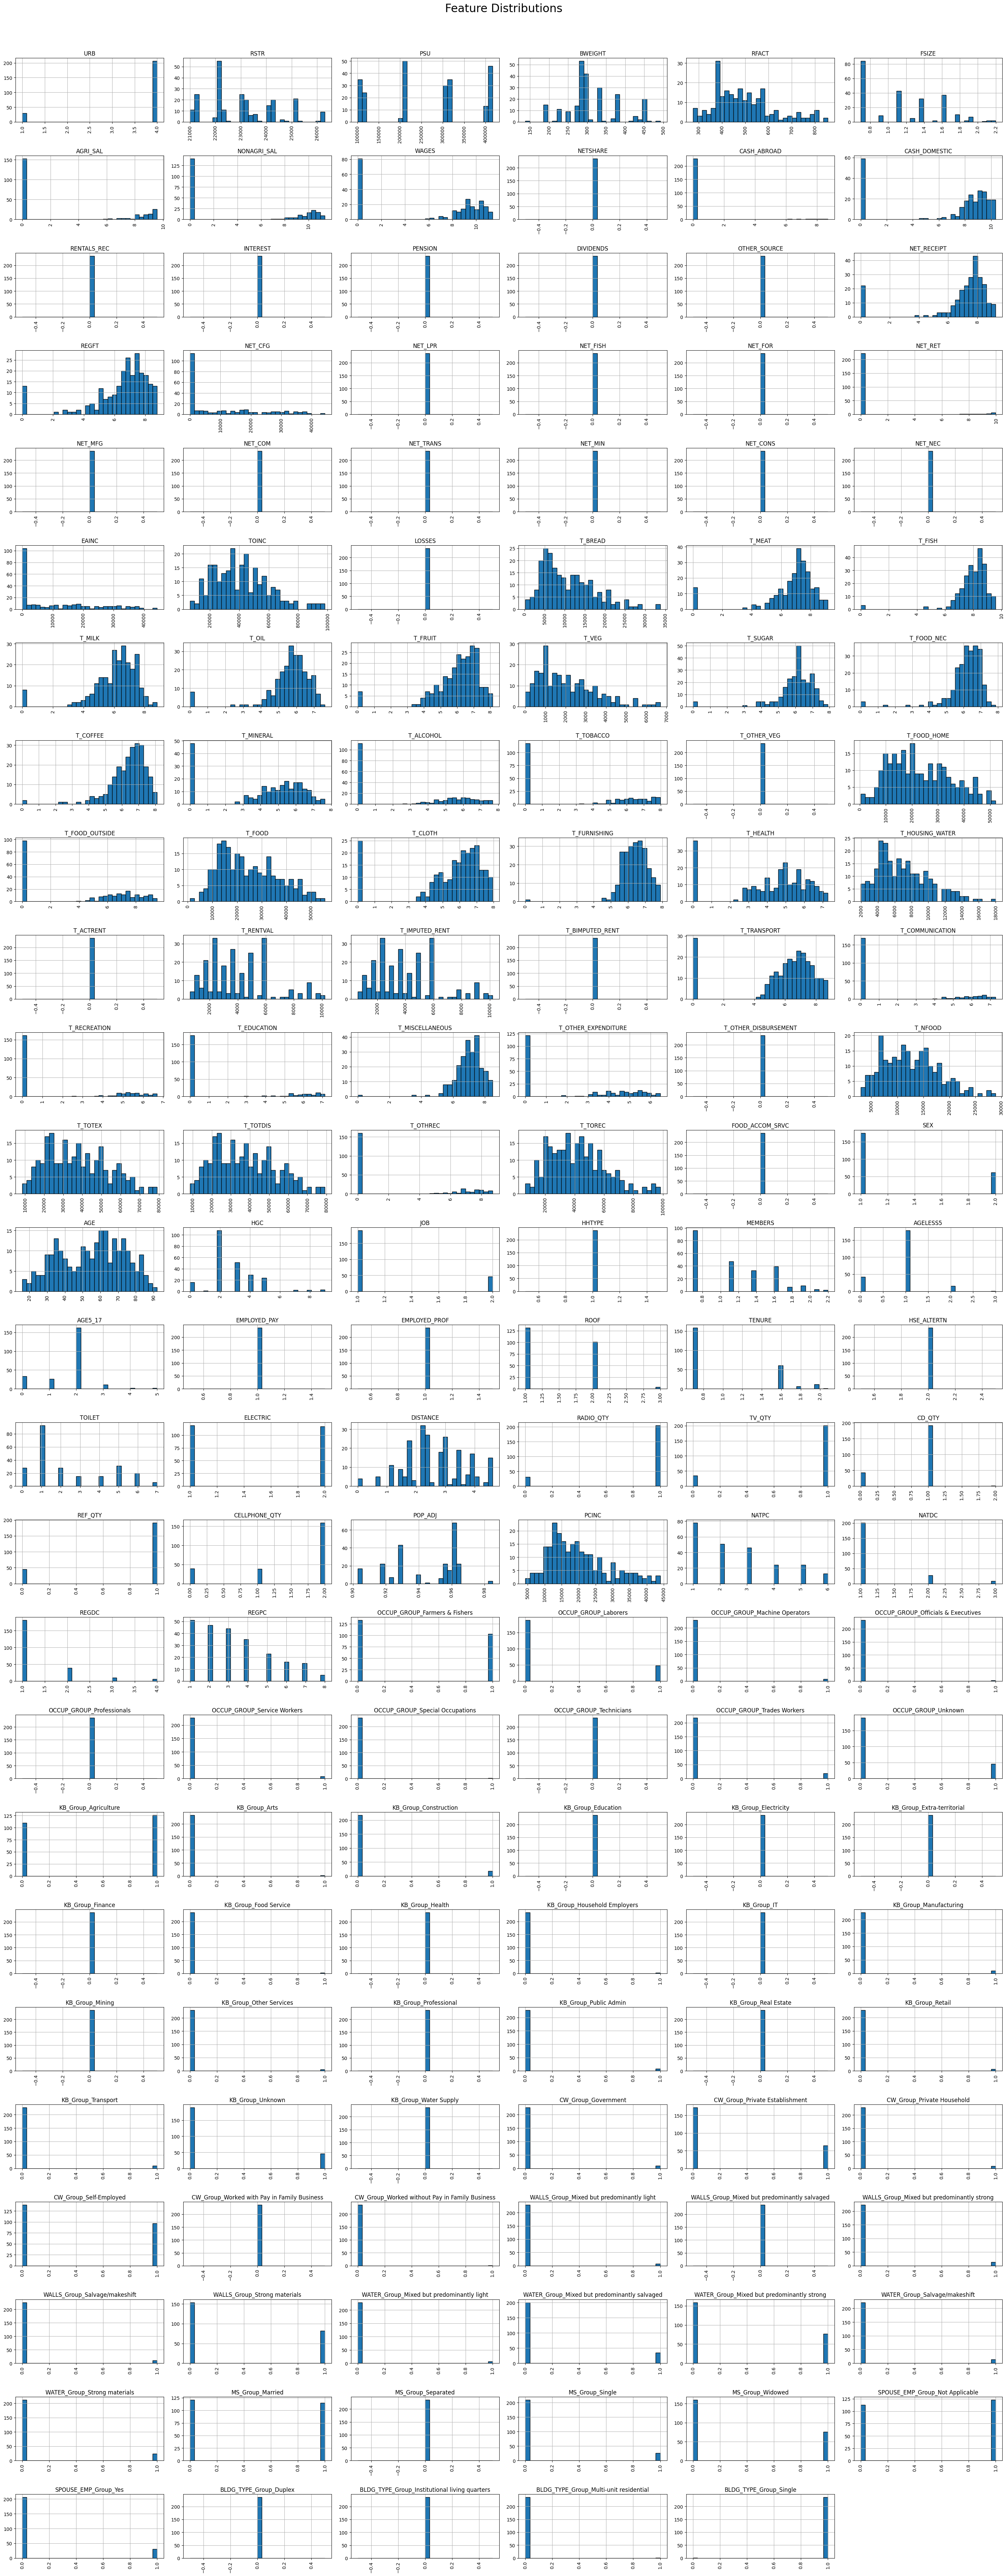

In [2076]:
num_features = len(fies_df.columns)
num_cols = 6  # Number of columns for subplots
num_rows = (num_features // num_cols) + (num_features % num_cols > 0)  # Calculate rows dynamically

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(30, num_rows * 3))  # Adjust height
fig.suptitle("Feature Distributions", fontsize=24)

# Flatten axes to easily loop through (handles cases where num_features < num_rows*num_cols)
axes = axes.flatten()

for i, col in enumerate(fies_df.columns):
    fies_df[col].hist(ax=axes[i], bins=30, edgecolor='black')
    axes[i].set_title(col, fontsize=12)
    axes[i].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for readability

# Hide any unused subplots (if features don't perfectly fit in grid)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust layout to fit suptitle
plt.show()

To address skewness in numeric variables, we applied transformations to make distributions more normal-like:

- **Log transformation** was used for variables with strong positive skew (skew > 1)
- **Square transformation** was used for variables with strong negative skew (skew < -1)

This helps improve the performance and convergence of many machine learning models, especially linear models and neural networks.


# **Section 6. Initial Model Training**

In this section we train and evaluate three distinct regression models using the cleaned and transformed dataset:

1. **Linear Regression**
2. **K-Nearest Neighbors (KNN)**
3. **Neural Network**

We begin by splitting the dataset into training and test sets using 5-fold cross-validation. Feature selection was applied beforehand using correlation filtering, Recursive Feature Elimination (RFE), and Variance Inflation Factor (VIF). This ensures that only the most informative and independent features are retained for modeling.

## **Splitting the Dataset (Setting up KFold) and Feature Selection**

In [2077]:
X = fies_df.drop(columns=["TOINC"])
y = fies_df["TOINC"]

In [2078]:
y_mean = np.mean(y)

In [2079]:
threshold = 0.85
corr_matrix = X.corr().abs()
features_to_drop = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        if corr_matrix.iloc[i, j] > threshold:
            feature1 = corr_matrix.columns[i]
            feature2 = corr_matrix.columns[j]
            avg_corr1 = corr_matrix[feature1].mean()
            avg_corr2 = corr_matrix[feature2].mean()
            feature_to_remove = feature1 if avg_corr1 > avg_corr2 else feature2
            features_to_drop.add(feature_to_remove)

X_filtered = X.drop(columns=features_to_drop)
print("Dropped Features (High Correlation):", features_to_drop)

Dropped Features (High Correlation): {'KB_Group_Unknown', 'T_TOTDIS', 'BLDG_TYPE_Group_Single', 'CW_Group_Private Household', 'MS_Group_Married', 'NET_CFG', 'REF_QTY', 'T_TOTEX', 'T_FOOD_HOME', 'T_IMPUTED_RENT', 'TV_QTY', 'CELLPHONE_QTY', 'PCINC', 'CW_Group_Government', 'T_FOOD', 'OCCUP_GROUP_Unknown', 'NATPC', 'FSIZE'}


In [2080]:
#def calculate_vif(df, threshold=10):
#    vif_data = pd.DataFrame()
#    vif_data["Feature"] = df.columns
#    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
#
#    while vif_data["VIF"].max() > threshold:
#        feature_to_remove = vif_data.sort_values(by="VIF", ascending=False).iloc[0]["Feature"]
#        print(f"Removing {feature_to_remove} (VIF={vif_data['VIF'].max():.2f})")
 #       df = df.drop(columns=[feature_to_remove])
#
#        vif_data = pd.DataFrame()
#        vif_data["Feature"] = df.columns
#        vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]##
#
#    return df, vif_data
#
#X_vif_filtered, vif_data_final = calculate_vif(X_filtered, threshold=10)##

#print("Remaining Features after VIF Filtering:")
#print(vif_data_final.sort_values(by="VIF", ascending=False))

In [2081]:
model_for_rfe = LinearRegression()
rfe = RFE(estimator=model_for_rfe, n_features_to_select=10)
rfe.fit(X_filtered, y)

X_final = X_filtered.loc[:, rfe.support_]
selected_features = X_filtered.loc[:, rfe.support_].columns.tolist()
print("Final Selected Features:", selected_features)

Final Selected Features: ['JOB', 'MEMBERS', 'NATDC', 'OCCUP_GROUP_Farmers & Fishers', 'OCCUP_GROUP_Laborers', 'OCCUP_GROUP_Machine Operators', 'OCCUP_GROUP_Officials & Executives', 'OCCUP_GROUP_Service Workers', 'OCCUP_GROUP_Trades Workers', 'CW_Group_Self-Employed']


In [2082]:
X_vif = pd.DataFrame(X_final, columns=X_final.columns)  # Convert to DataFrame if not already

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_data.sort_values(by="VIF", ascending=False))

                              Feature        VIF
2                               NATDC  10.811375
1                             MEMBERS  10.260211
3       OCCUP_GROUP_Farmers & Fishers   8.697332
9              CW_Group_Self-Employed   7.224998
0                                 JOB   5.612418
8          OCCUP_GROUP_Trades Workers   1.975293
4                OCCUP_GROUP_Laborers   1.782608
5       OCCUP_GROUP_Machine Operators   1.369812
6  OCCUP_GROUP_Officials & Executives   1.263507
7         OCCUP_GROUP_Service Workers   1.186565


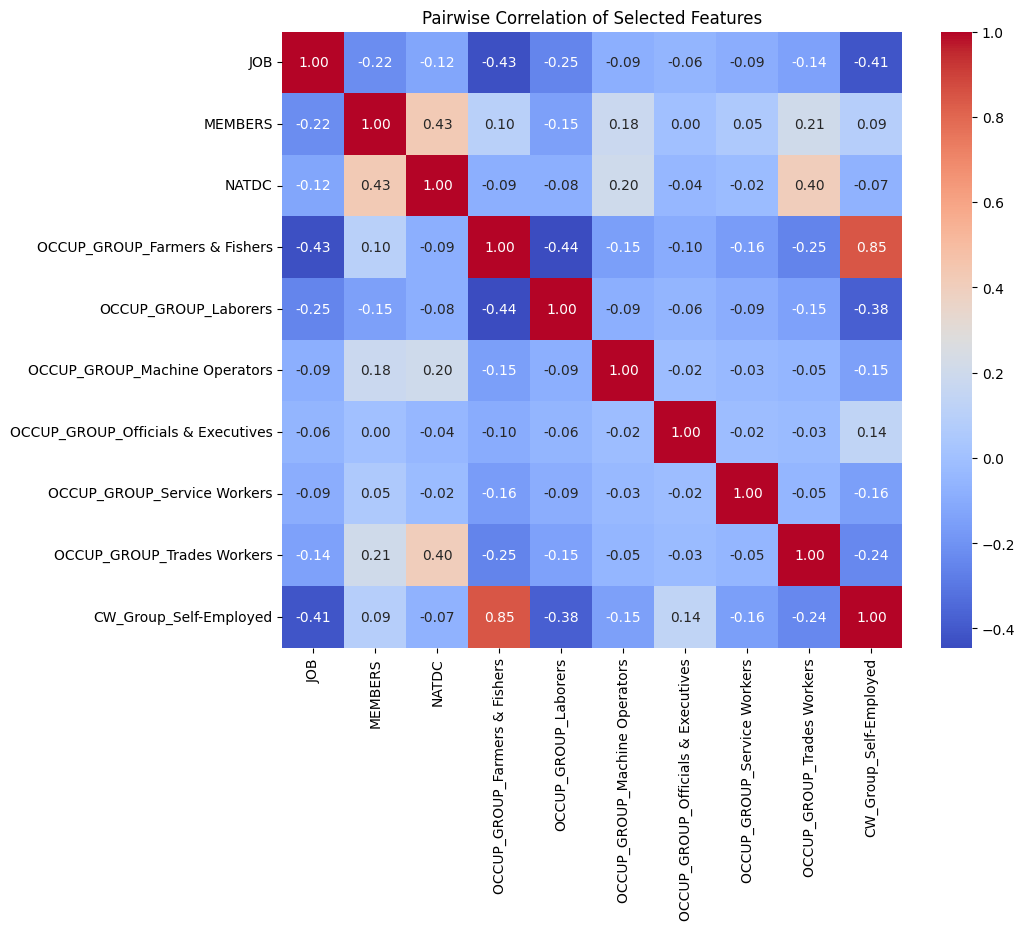

In [2083]:
plt.figure(figsize=(10, 8))
sns.heatmap(X_final.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Pairwise Correlation of Selected Features")
plt.show()

## **Linear Regression**

My guide: https://www.kaggle.com/code/nicolasgonzalezmunoz/cross-validation-dataset-split-strategies

In [2084]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [2085]:
mae_scores = []

In [2086]:
for train_index, val_index in kf.split(X_final):
    X_train, X_val = X_final.iloc[train_index], X_final.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    model = LinearRegression()
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_val_scaled)
    mae_scores.append(mean_absolute_error(y_val, y_pred))

print("Linear Regression Mean MAE:", np.mean(mae_scores))

Linear Regression Mean MAE: 7471.151776788007


### ***Check for Overfitting and Multicollinearity***

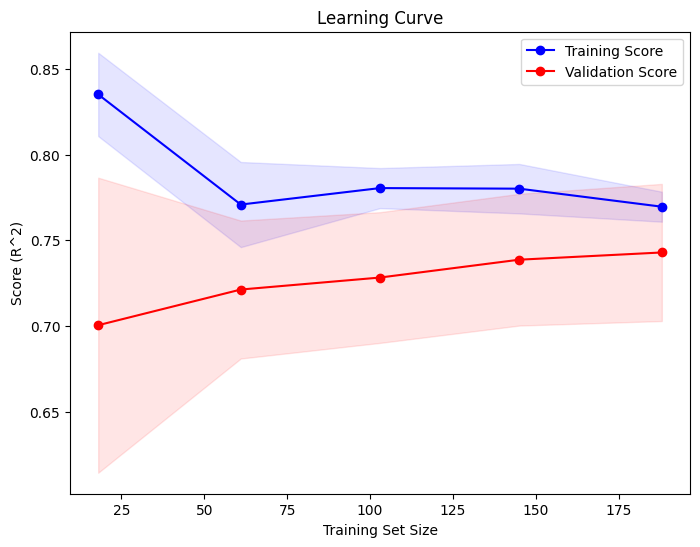

In [2087]:
train_sizes, train_scores, val_scores = learning_curve(
    model, X_final, y, cv=5, scoring="r2", n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', label="Training Score", color="blue")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")

plt.plot(train_sizes, val_mean, 'o-', label="Validation Score", color="red")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color="red")

plt.xlabel("Training Set Size")
plt.ylabel("Score (R^2)")
plt.title("Learning Curve")
plt.legend()
plt.show()

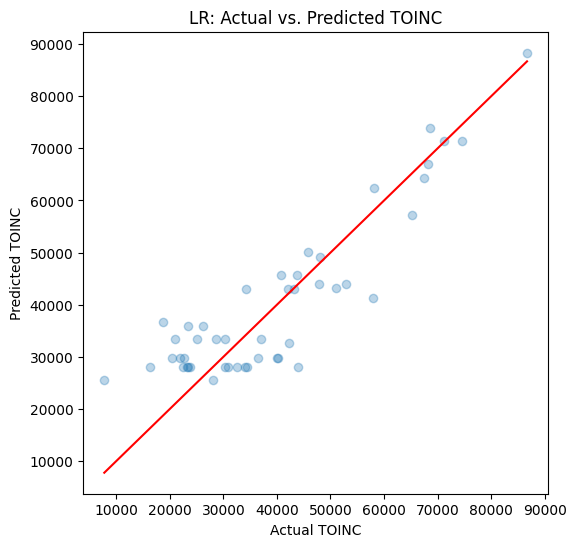

R² Score: 0.793


In [2088]:
plt.figure(figsize=(6,6))
plt.scatter(y_val, y_pred, alpha=0.3)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red')
plt.xlabel("Actual TOINC")
plt.ylabel("Predicted TOINC")
plt.title("LR: Actual vs. Predicted TOINC")
plt.show()

r2 = r2_score(y_val, y_pred)
print(f"R² Score: {r2:.3f}")

## **K Nearest Neighbors Regression**

We first initialized an instance of the imported KNeighborsRegressor class from sklearn.neighbors. The KNN regressor will be used to predict target values based on the k-nearest neighbors in the feature space.

In [2089]:
#knn = KNeighborsRegressor()

Here, the KNN regressor is fitted to the training data (X_train and y_train). This step allows the model to learn the relationship between the features and the target values.

In [2090]:
#knn.fit(X_train, y_train)

Next, the fitted KNN regressor is used to predict the target values for the test data (X_test). The predictions are stored in y_pred. The model's performance is then evaluated using Mean Squared Error (MSE). The mean_squared_error function compares the true target values (y_test) with the predicted values (y_pred) and calculates the MSE, which is then printed.

In [2091]:
#y_pred = knn.predict(X_final)
#print(mean_squared_error(y_val, y_pred))

The same is done for the train data.

In [2092]:
#y_train_pred = knn.predict(X_train)
#print(mean_squared_error(y_train, y_train_pred))

In [2093]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [2094]:
mae_scores = []

In [2095]:
for train_index, val_index in kf.split(X_final):
    X_train, X_val = X_final.iloc[train_index], X_final.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]


    # Scale Data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)


    # Train KNN Model
    knn = KNeighborsRegressor(n_neighbors=10)  # You can tune n_neighbors
    knn.fit(X_train_scaled, y_train)


    # Predict & Compute MAE
    y_pred = knn.predict(X_val_scaled)
    mae = mean_absolute_error(y_val, y_pred)
    mae_scores.append(mae)


print("MAE Scores per Fold:", mae_scores)
print("Mean MAE:", np.mean(mae_scores))

MAE Scores per Fold: [9735.754166666668, 11023.729787234042, 7475.721276595746, 9642.821276595747, 7813.82765957447]
Mean MAE: 9138.370833333334


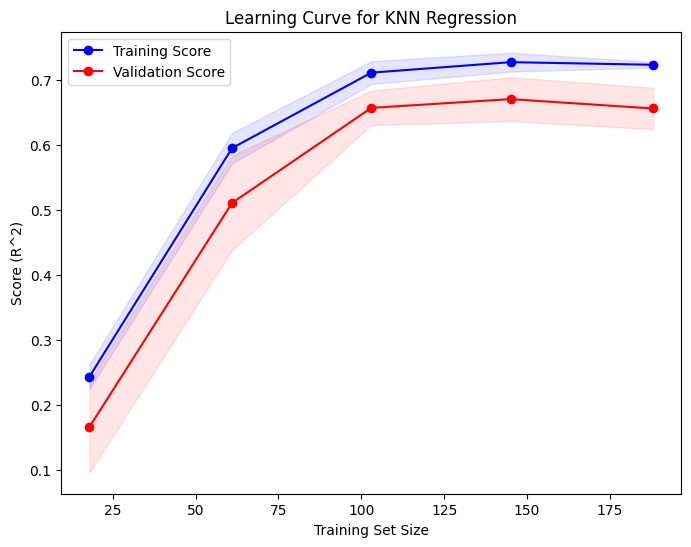

In [2096]:
train_sizes, train_scores, val_scores = learning_curve(
    knn, X_final, y, cv=5, scoring="r2", n_jobs=-1
)


# Compute mean and std for training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)


# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', label="Training Score", color="blue")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")


plt.plot(train_sizes, val_mean, 'o-', label="Validation Score", color="red")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color="red")


plt.xlabel("Training Set Size")
plt.ylabel("Score (R^2)")
plt.title("Learning Curve for KNN Regression")
plt.legend()
plt.show()


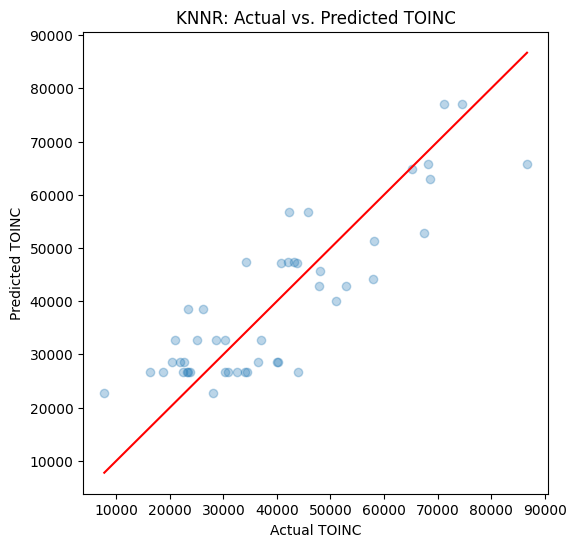

R² Score: 0.732


In [2097]:
plt.figure(figsize=(6,6))
plt.scatter(y_val, y_pred, alpha=0.3)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red')
plt.xlabel("Actual TOINC")
plt.ylabel("Predicted TOINC")
plt.title("KNNR: Actual vs. Predicted TOINC")
plt.show()

r2 = r2_score(y_val, y_pred)
print(f"R² Score: {r2:.3f}")

## **Neural Networks**

This section trains a **Neural Network** (**NN**) **for regression** to predict **Total Income** (**TOINC**). The model is designed to handle **non-linear relationship**s in the data and is evaluated to ensure it is **neither overfitting nor underfitting**.

We use the selected features (X_final) and target (y) from the feature selection section.

In [2098]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

We scale both features and the target variable.

In [2099]:
# Scale X
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Scale y (target)
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

We build a Sequential model with 4 hidden layers using ReLU, BatchNorm, and Dropout.

In [2100]:
model = Sequential([
    Dense(128, input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Activation("relu"),
    Dropout(0.2),

    Dense(64),
    BatchNormalization(),
    Activation("relu"),
    Dropout(0.2),

    Dense(32),
    BatchNormalization(),
    Activation("relu"),
    Dropout(0.2),

    Dense(16),
    BatchNormalization(),
    Activation("relu"),

    Dense(1, activation="linear")  # For regression
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Using Adam optimizer, MSE as loss, and MAE as the evaluation metric.

In [2101]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=Huber(),
    metrics=["mae"]
)

We use `EarlyStopping` and `ReduceLROnPlateau` to improve training.

In [2102]:
reduce_lr = ReduceLROnPlateau(
    monitor="val_loss", factor=0.5, patience=5, min_lr=1e-5, verbose=1
)

early_stopping = EarlyStopping(
    monitor="val_loss", patience=10, restore_best_weights=True
)

We then train the model

In [2103]:
history = model.fit(
    X_train_scaled, y_train_scaled,
    epochs=100,
    batch_size=16,
    validation_data=(X_test_scaled, y_test_scaled),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.6050 - mae: 1.0034 - val_loss: 0.5111 - val_mae: 0.9129 - learning_rate: 0.0010
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4400 - mae: 0.8081 - val_loss: 0.4677 - val_mae: 0.8630 - learning_rate: 0.0010
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3109 - mae: 0.6434 - val_loss: 0.4567 - val_mae: 0.8515 - learning_rate: 0.0010
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.3595 - mae: 0.7146 - val_loss: 0.4516 - val_mae: 0.8435 - learning_rate: 0.0010
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.2522 - mae: 0.6010 - val_loss: 0.4503 - val_mae: 0.8416 - learning_rate: 0.0010
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2935 - mae: 0.6242 - val_loss: 0.4344 - val_mae: 0.8225 - learning_rate: 0.0010
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.2451 - mae: 0.5617 - val_loss: 0.4252 - val_mae: 0.8094 - learning_rate: 0.0010
Epoch 

We evaluate using the scaled test set and then inverse-transform to get predictions in the original scale.

In [2104]:
# Predict
y_pred_scaled = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# Inverse scale y_test for comparison
y_actual = scaler_y.inverse_transform(y_test_scaled)

# Evaluate MAE
test_loss, test_mae = model.evaluate(X_test_scaled, y_test_scaled, verbose=0)
print(f"Test MAE: {test_mae}")

true_mae = mean_absolute_error(y_test, y_pred)
print(f"True Test MAE: {true_mae}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
Test MAE: 0.4918358325958252
True Test MAE: 8569.702107747396


***Note***:

> The MAE was originally computed on scaled data (~0.112), but after inverse transforming, the true MAE is ₱12,206, which reflects real income units



We then compare the model’s predictions with actual values from the test dataset.

In [2105]:
results = pd.DataFrame({
    "Actual": y_actual.flatten(),
    "Predicted": y_pred.flatten()
})
print(results.head())

    Actual      Predicted
0  52046.0   36559.859375
1  97062.0  102889.734375
2  54480.0   42740.878906
3  45612.0   40630.820312
4  43632.0   40854.761719


To ensure proper generalization, we **plot the loss curves** for both training and validation data.

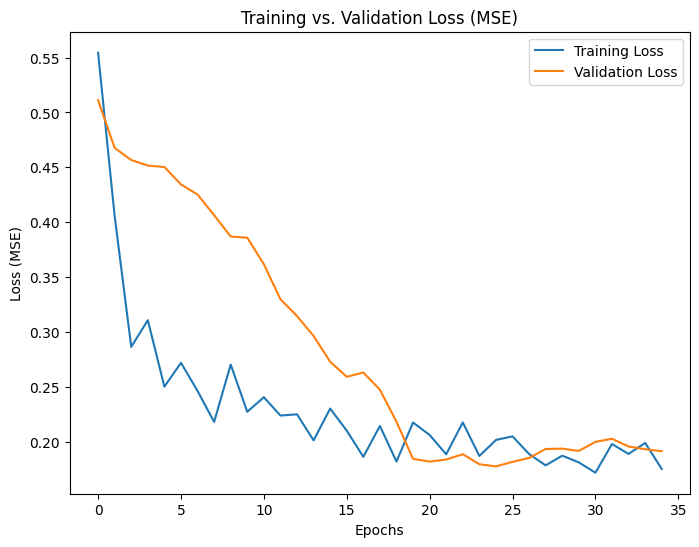

In [2106]:
plt.figure(figsize=(8,6))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training vs. Validation Loss (MSE)")
plt.legend()
plt.show()

Here is a visual representation of our prediction quality

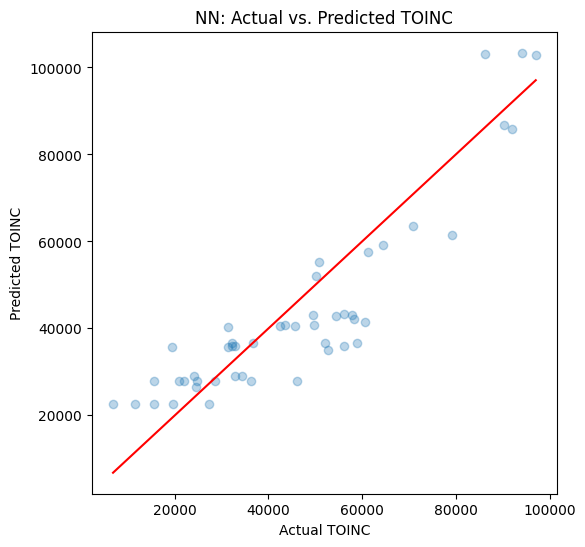

R² Score: 0.790


In [2107]:
plt.figure(figsize=(6,6))
plt.scatter(y_actual, y_pred, alpha=0.3)
plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], color='red')
plt.xlabel("Actual TOINC")
plt.ylabel("Predicted TOINC")
plt.title("NN: Actual vs. Predicted TOINC")
plt.show()

r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.3f}")

# **Section 7. Error Analysis**

### For this section:

✅	Show MAE, MSE, R² for all models <br>
✅	Identify and sort high-error predictions <br>
✅	Interpret why those errors might be occurring <br>
✅	Suggest what could improve the model (e.g., feature engineering, handling outliers)